In [547]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [548]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import chart_studio.plotly as py
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

import plotly.express as px

In [565]:
data = pd.read_csv("ds_salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [540]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [338]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


<AxesSubplot:>

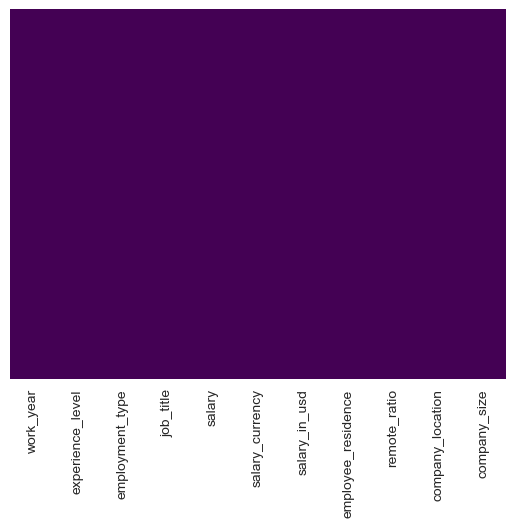

In [339]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# Since there's no null value, no need to clean or remove data points

In [340]:
data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [566]:
data.drop(['salary','salary_currency'], axis=1, inplace = True)

data['experience_level'] = data['experience_level'].replace('EN','Entry level')
data['experience_level'] = data['experience_level'].replace('MI','Mid level')
data['experience_level'] = data['experience_level'].replace('SE','Senior level')
data['experience_level'] = data['experience_level'].replace('EX','Executive level')

data['remote_ratio'] = data['remote_ratio'].replace({
    0 : 'On-Site',
    50 : 'Half-Remote',
    100 : 'Full-Remote',
})

data['employment_type'] = data['employment_type'].replace('FT','Full time')
data['employment_type'] = data['employment_type'].replace('PT','Part time')
data['employment_type'] = data['employment_type'].replace('CT','Contract')
data['employment_type'] = data['employment_type'].replace('FL','Freelance')

data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior level,Full time,Principal Data Scientist,85847,ES,Full-Remote,ES,L
1,2023,Mid level,Contract,ML Engineer,30000,US,Full-Remote,US,S
2,2023,Mid level,Contract,ML Engineer,25500,US,Full-Remote,US,S
3,2023,Senior level,Full time,Data Scientist,175000,CA,Full-Remote,CA,M
4,2023,Senior level,Full time,Data Scientist,120000,CA,Full-Remote,CA,M




**EXPERIENCE LEVEL**

In [78]:
data['experience_level'].value_counts()

Senior-level       2516
Mid-level           805
Entry-level         320
Executive-level     114
Name: experience_level, dtype: int64

Text(0.5, 1.0, 'Experience level distribution')

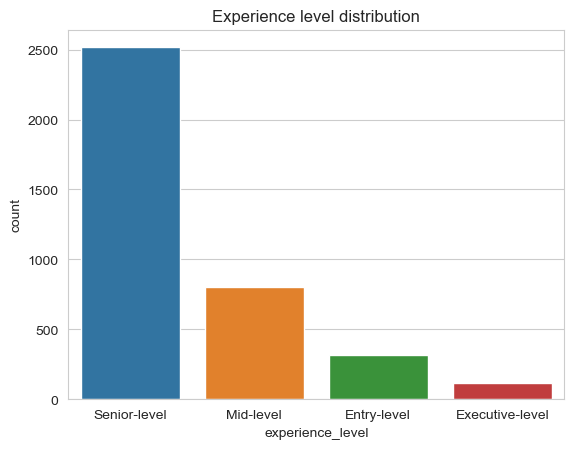

In [79]:
sns.countplot(x = 'experience_level', data = data)
plt.title("Experience level distribution")

**EMPLOYMENT TYPE**

In [108]:
group = data['employment_type'].value_counts()
group

Full time    3718
Part time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64

In [584]:
fig = px.bar(x = group.index, y = group.values, color = group.index, text = group.values, 
       title = 'Employment Type Distribution')
fig.update_layout(xaxis_title = "Employment Type", yaxis_title = "Count")
fig.show()

**JOB DESIGNATIONS**

In [144]:
data['job_title'].nunique()

93

In [585]:
# Take out 15 most popular jobs
gr = data['job_title'].value_counts()[:20]

fig = px.bar(x = gr.index, y = gr.values, text = gr.values, 
       title = 'Top 20 Job Designations')
fig.update_layout(xaxis_title = 'Job Designations', yaxis_title = "Count")
fig.show()

**SIZE OF COMPANIES**

In [586]:
fig = px.pie(values = data['company_size'].value_counts().values, names = data['company_size'].value_counts().index,
      title = 'Size of Companies Distribution')
fig.show()

**WORK YEARS**

In [587]:
fig = px.pie(values = data['work_year'].value_counts().values, names = data['work_year'].value_counts().index,
      title = 'Work Year Distribution')
fig.show()

**REMOTENESS**

In [588]:
fig = px.pie(values = data['remote_ratio'].value_counts().values, names = data['remote_ratio'].value_counts().index,
      title = 'Remoteness Distribution')
fig.show()

**SALARY**

In [589]:
fig = px.box(x = data['salary_in_usd'], title = 'Salary Distribution')
fig.update_layout(xaxis_title = 'Salary in USD')
fig.show()

**Does working in bigger companies always lead to better salary?

In [273]:
size_salary = data[['company_size','salary_in_usd']]

In [590]:
size = size_salary['company_size'].value_counts().index
mean_salary = [size_salary.loc[size_salary['company_size'] == 'M']['salary_in_usd'].mean(), 
               size_salary.loc[size_salary['company_size'] == 'L']['salary_in_usd'].mean(),
               size_salary.loc[size_salary['company_size'] == 'S']['salary_in_usd'].mean()]

fig = px.bar(x = size, y = mean_salary, text = mean_salary, color = size,
       title = 'Mean Salary based on Size of Companies')
fig.update_layout(xaxis_title = 'Size of Companies', yaxis_title = "Mean Salary")
fig.show()

**Does experience level make any difference?

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

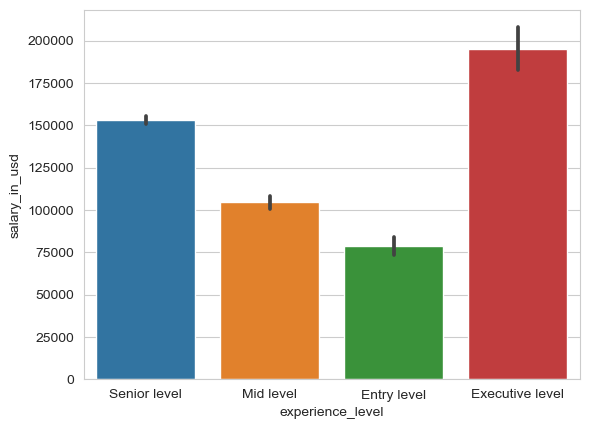

In [300]:
sns.barplot(data = data, x='experience_level',y='salary_in_usd')

**JOB CATEGORY**

In [572]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", 
                        "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", 
                        "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher",
                      "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", 
                        "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead",
                  "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Others"

data['job_category'] = data['job_title'].apply(assign_broader_category)
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior level,Full time,Principal Data Scientist,85847,ES,Full-Remote,ES,L,Others
1,2023,Mid level,Contract,ML Engineer,30000,US,Full-Remote,US,S,Machine Learning
2,2023,Mid level,Contract,ML Engineer,25500,US,Full-Remote,US,S,Machine Learning
3,2023,Senior level,Full time,Data Scientist,175000,CA,Full-Remote,CA,M,Data Science
4,2023,Senior level,Full time,Data Scientist,120000,CA,Full-Remote,CA,M,Data Science


In [591]:
fig = px.bar(x = data['job_category'].value_counts().values, y = data['job_category'].value_counts().index, 
       text = data['job_category'].value_counts().values, title = 'Job Category Distribution')
fig.show()

**Which job category has the highest average earning?

In [592]:
mean_salary_1 = [data.loc[data['job_category'] == 'Data Engineering']['salary_in_usd'].mean(), 
               data.loc[data['job_category'] == 'Data Science']['salary_in_usd'].mean(),
               data.loc[data['job_category'] == 'Machine Learning']['salary_in_usd'].mean(),
               data.loc[data['job_category'] == 'Data Architecture']['salary_in_usd'].mean(),
               data.loc[data['job_category'] == 'Management']['salary_in_usd'].mean(),
               data.loc[data['job_category'] == 'Others']['salary_in_usd'].mean()
              ]

fig = px.bar(x = data['job_category'].value_counts().index, y = mean_salary_1, text = mean_salary_1,
             color = data['job_category'].value_counts().index,
             title = 'Mean Salary based on Job Category')
fig.update_layout(xaxis_title = 'Job Category', yaxis_title = "Mean Salary")
fig.show()

**Median salary by job category each year**

Text(147.31597222222223, 0.5, 'Job Category')

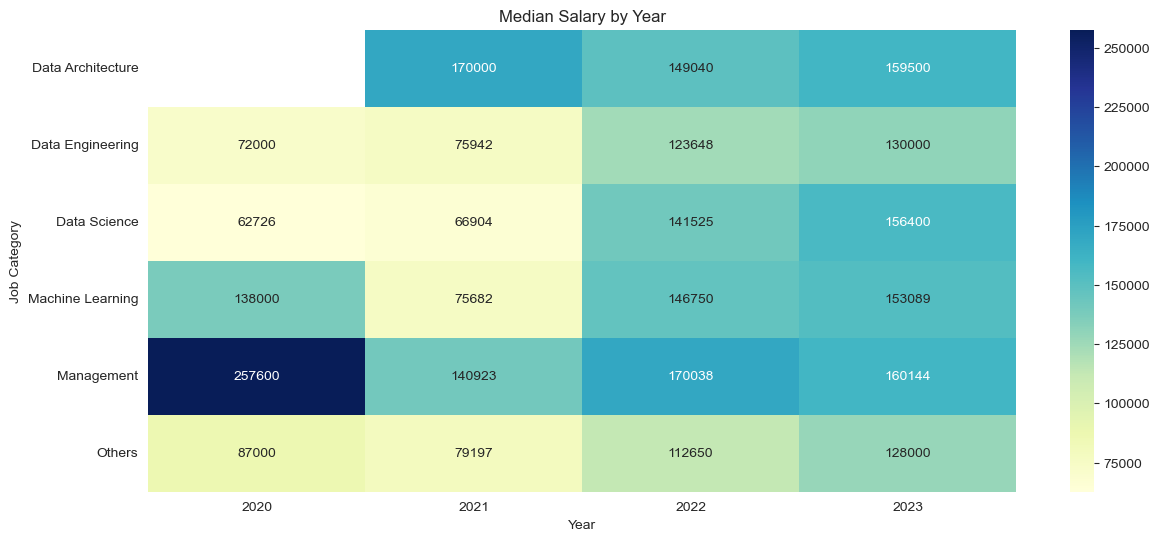

In [371]:
pivot_table = data.pivot_table(values='salary_in_usd', index='job_category', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Job Category')

**Mean salary in each country**

In [575]:
import pycountry
# Convert codes to names

def country_name(code):
     try:
        return pycountry.countries.get(alpha_2=code).name
     except:
        return code
def country_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return None
    
data['company_location'] = data['company_location'].apply(country_name)
data['employee_residence'] = data['employee_residence'].apply(country_name)

In [576]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior level,Full time,Principal Data Scientist,85847,Spain,Full-Remote,Spain,L,Others
1,2023,Mid level,Contract,ML Engineer,30000,United States,Full-Remote,United States,S,Machine Learning
2,2023,Mid level,Contract,ML Engineer,25500,United States,Full-Remote,United States,S,Machine Learning
3,2023,Senior level,Full time,Data Scientist,175000,Canada,Full-Remote,Canada,M,Data Science
4,2023,Senior level,Full time,Data Scientist,120000,Canada,Full-Remote,Canada,M,Data Science


In [593]:
country_df = data.groupby(['company_location'])['salary_in_usd'].mean().sort_values(ascending = False).to_frame()
fig = px.bar(x = country_df.index, y = country_df['salary_in_usd'].values, title = 'Mean Salary by Country' )
fig.update_layout(xaxis_title = 'Country', yaxis_title = "Mean Salary")
fig.show()

# Regression module evaluation metrics


**Logistic Regression**

In [447]:
df = data.copy()

categorical_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size','job_category']
numerical_columns = ['salary_in_usd']

dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [438]:
dummy_variables.drop(['job_title', 'employee_residence', 'company_location'], axis = 1, inplace = True)

In [439]:
# To check if salary is over 6 figures

def salary(x):
    if x>100000:
        return 1
    else:
        return 0
dummy_variables['salary_in_usd'] = dummy_variables['salary_in_usd'].apply(lambda x: salary(x))
dummy_variables.head()

,work_year,salary_in_usd,experience_level_Entry level,experience_level_Executive level,experience_level_Mid level,experience_level_Senior level,employment_type_Contract,employment_type_Freelance,employment_type_Full time,employment_type_Part time,...,remote_ratio_On-Site,company_size_L,company_size_M,company_size_S,job_category_Data Architecture,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Others
0,2023,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,2023,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2023,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2023,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2023,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [429]:
X = dummy_variables.drop('salary_in_usd',axis=1)
y = dummy_variables['salary_in_usd']

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [433]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [434]:
predictions = logmodel.predict(X_test)

Evaluation

In [435]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.43      0.54       320
           1       0.81      0.93      0.87       807

    accuracy                           0.79      1127
   macro avg       0.76      0.68      0.70      1127
weighted avg       0.78      0.79      0.77      1127



**Preprosessing & Scaling Data**

In [448]:
dummy_variables =  pd.get_dummies(df, columns=categorical_columns, drop_first=False)
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

In [459]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [460]:
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df.drop(['work_year'], axis=1, inplace  = True)

In [462]:
processed_df.head()

,job_title,employee_residence,company_location,experience_level_Entry level,experience_level_Executive level,experience_level_Mid level,experience_level_Senior level,employment_type_Contract,employment_type_Freelance,employment_type_Full time,...,company_size_L,company_size_M,company_size_S,job_category_Data Architecture,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Others,salary_in_usd
0,Principal Data Scientist,ES,ES,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,-0.820391
1,ML Engineer,US,US,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,-1.706187
2,ML Engineer,US,US,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,-1.777563
3,Data Scientist,CA,CA,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0.593676
4,Data Scientist,CA,CA,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,-0.278686


Text(0.5, 1.0, 'Correlation Heatmap')

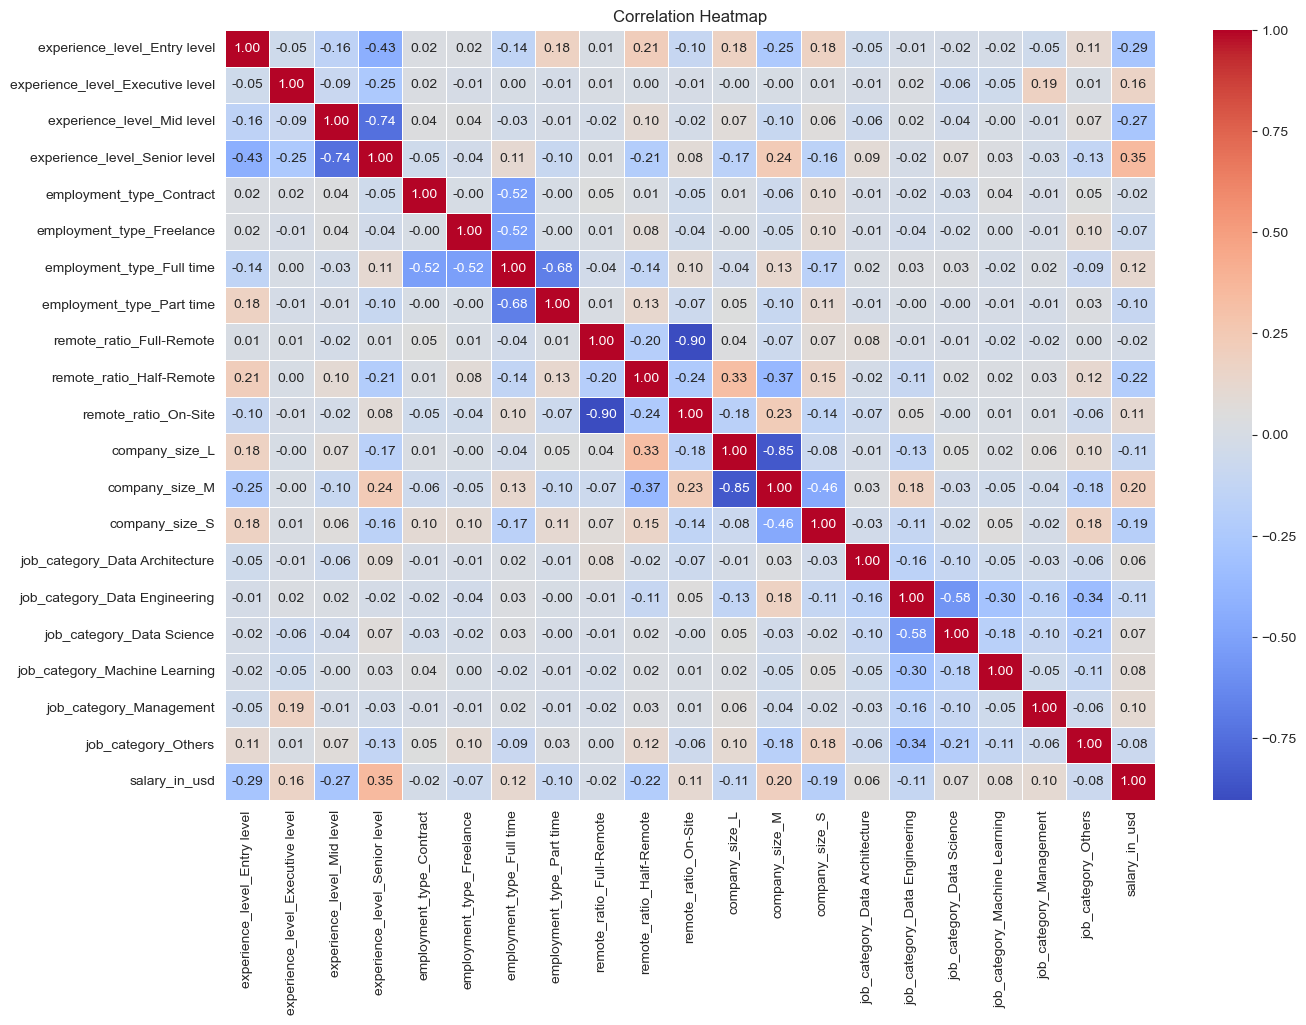

In [496]:
correlation_matrix = processed_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap")

In [498]:
sorted_corr = correlation_matrix['salary_in_usd'].drop('salary_in_usd').sort_values(ascending=False)

Text(0.5, 1.0, 'Salary Correlation')

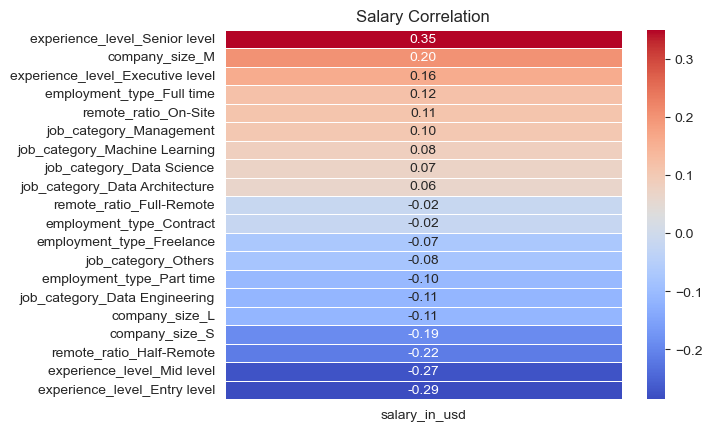

In [499]:
sns.heatmap(sorted_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title("Salary Correlation")